In [1]:
import numpy as np 
import pandas as pd 

# for data visualization
import seaborn as sns 
import matplotlib.pylab as plt

# for the pre-processing of the data
from sklearn.preprocessing import StandardScaler

# for machine learning models 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# for the metrics of machine learning models 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.model_selection import KFold

# others 
import time
import random

In [2]:
pulsars = pd.read_csv("HTRU_2.csv")

# to check if we have to clean the data 
print(pulsars.apply(pd.Series.count))

Profile_mean        17898
Profile_stdev       17898
Profile_kurtosis    17898
Profile_skewness    17898
DM_mean             17898
DM_stdev            17898
DM_kurtosis         17898
DM_skewness         17898
class               17898
dtype: int64


In [3]:
pulsars.head(20)

,Profile_mean,Profile_stdev,Profile_kurtosis,Profile_skewness,DM_mean,DM_stdev,DM_kurtosis,DM_skewness,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
# we set the seed for the random cursor
random.seed(10)

# we split the data
X = pulsars.drop(['class'], axis = 1)
y = pulsars['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 10)
X_columns = X_train.columns

<AxesSubplot:>

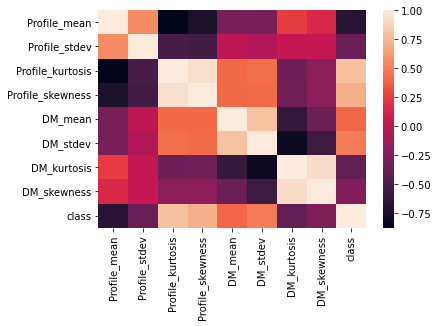

In [5]:
#correlation plot
corr = pulsars.corr()
sns.heatmap(corr)

C:\Users\CANARA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CANARA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CANARA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

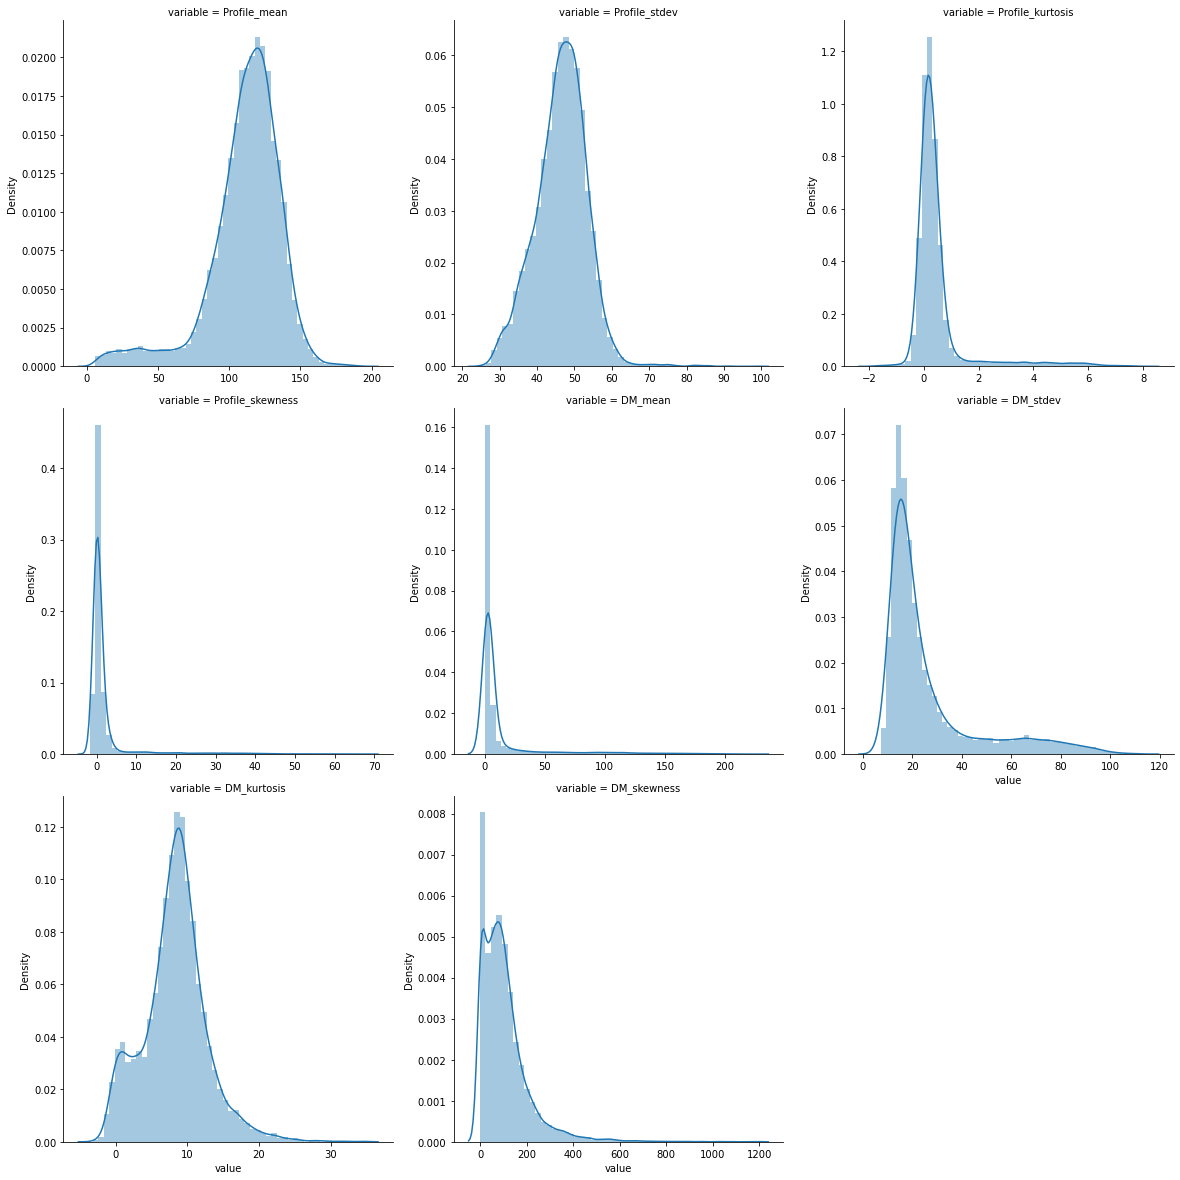

In [6]:
#create numeric plots
num = [f for f in X_train.columns if X_train.dtypes[f] != 'object']
nd = pd.melt(X_train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, height = 5.5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train = pd.DataFrame(X_train, columns = X_columns)
X_test = pd.DataFrame(X_test, columns = X_columns)
columns = ['Decision_tree', 'Logistic_regression', 'Random_forest']
index = ['time(s)', 'accuracy', 'recall', 'f1_score_weighted', 'AUC']
performance_df = pd.DataFrame(columns = columns, index = index)

In [9]:
# we start by DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth = 4)
dc.fit(X_train, y_train)

params = {'max_depth' : [2,4,8]}
dcgrid = GridSearchCV(estimator = dc, param_grid = params, cv = KFold(5, random_state = None) , scoring = 'accuracy')
dcgrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'max_depth': [2, 4, 8]}, scoring='accuracy')

In [10]:
# Then by LogisticRegression

lg = LogisticRegression(C=0.001, solver='liblinear')
lg.fit(X_train, y_train)

params = {'C':[0.01,0.1,1,10]}
lggrid = GridSearchCV(estimator = lg, param_grid = params, cv = KFold(5, random_state = None), scoring = 'accuracy')
lggrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(C=0.001, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [11]:
# then by RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, max_depth = 10)
rf.fit(X_train, y_train)

params = {'n_estimators' : [10, 20, 50, 100], 'max_depth' : [10, 50]}
rfgrid = GridSearchCV(estimator = rf, param_grid = params, cv = KFold(5, random_state = None), scoring = 'accuracy')
rfgrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=10, n_estimators=10),
             param_grid={'max_depth': [10, 50],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='accuracy')

In [12]:
# we define the best models 
dc_best = dcgrid.best_estimator_
lg_best = lggrid.best_estimator_
rf_best = rfgrid.best_estimator_

# we calculate time for DecisionTree 
start = time.time()
dc = dc_best
dc_best.fit(X_train, y_train)
end = time.time()
print('time for Decision Tree Classifier = ', end - start, 's')
performance_df['Decision_tree']['time(s)'] = end - start

# Then for LogisticRegression
start = time.time()
lg = lg_best
lg_best.fit(X_train, y_train)
end = time.time()
print('time for Logisitic Regression= ', end - start, 's')
performance_df['Logistic_regression']['time(s)'] = end - start

# Then for RandomForestClassifier
start = time.time()
rf = rf_best
rf_best.fit(X_train, y_train)
end = time.time()
print('time for Random Forst Classifier = ', end - start, 's')
performance_df['Random_forest']['time(s)'] = end - start

time for Decision Tree Classifier =  0.04897046089172363 s
time for Logisitic Regression=  0.028983116149902344 s
time for Random Forst Classifier =  1.691819667816162 s


In [13]:
# we will calculate the scores of each model 
y_predict_dc = dc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_dc)
recall = recall_score(y_test, y_predict_dc)
performance_df['Decision_tree']['accuracy'] = accuracy
performance_df['Decision_tree']['recall'] = recall

y_predict_lg = lg_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_lg)
recall = recall_score(y_test, y_predict_lg)
performance_df['Logistic_regression']['accuracy'] = accuracy
performance_df['Logistic_regression']['recall'] = recall

y_predict_rf = rf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_rf)
recall = recall_score(y_test, y_predict_rf)
performance_df['Random_forest']['accuracy'] = accuracy
performance_df['Random_forest']['recall'] = recall

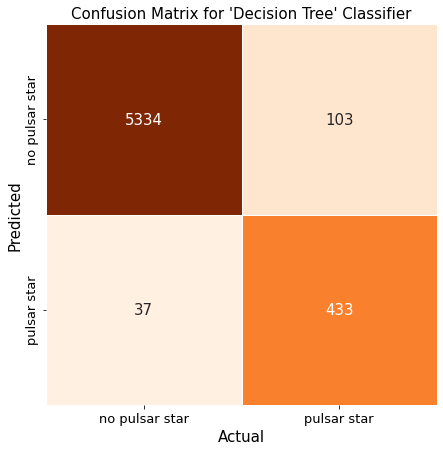


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5371
           1       0.92      0.81      0.86       536

    accuracy                           0.98      5907
   macro avg       0.95      0.90      0.92      5907
weighted avg       0.98      0.98      0.98      5907



In [14]:
# generate confusion matrix for Decision Tree classifier
conf_mat_dc = confusion_matrix(y_test, y_predict_dc)
# put it into a dataframe for seaborn plot function
conf_mat_dc_df = pd.DataFrame(conf_mat_dc)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_mat_dc_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Decision Tree' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_dc))

performance_df['Decision_tree']['f1_score_weighted'] = f1_score(y_test, y_predict_dc, average = 'weighted')

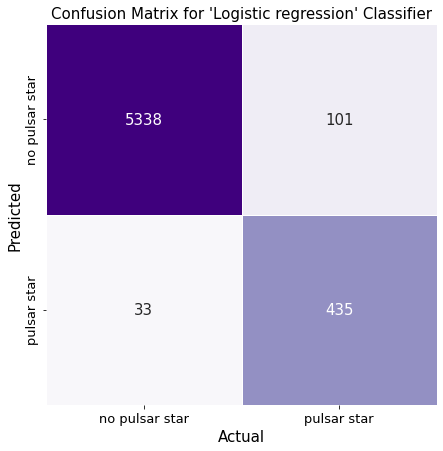


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5371
           1       0.93      0.81      0.87       536

    accuracy                           0.98      5907
   macro avg       0.96      0.90      0.93      5907
weighted avg       0.98      0.98      0.98      5907



In [15]:
# generate confusion matrix for Logistic Regression classifier
conf_mat_lg = confusion_matrix(y_test, y_predict_lg)
# put it into a dataframe for seaborn plot function
conf_mat_lg_df = pd.DataFrame(conf_mat_lg)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_mat_lg_df.T, annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Logistic regression' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_lg))


performance_df['Logistic_regression']['f1_score_weighted'] = f1_score(y_test, y_predict_lg, average = 'weighted')

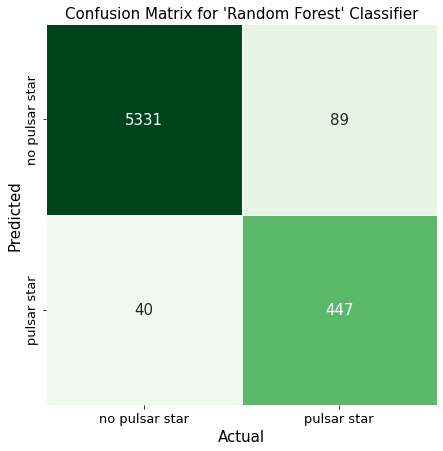


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5371
           1       0.92      0.83      0.87       536

    accuracy                           0.98      5907
   macro avg       0.95      0.91      0.93      5907
weighted avg       0.98      0.98      0.98      5907



In [16]:
# generate confusion matrix for Random Forest classifier
conf_mat_rf = confusion_matrix(y_test, y_predict_rf)
# put it into a dataframe for seaborn plot function
conf_mat_rf_df = pd.DataFrame(conf_mat_rf)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_mat_rf_df.T, annot=True, annot_kws={"size": 15}, cmap="Greens", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Random Forest' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predict_rf))

performance_df['Random_forest']['f1_score_weighted'] = f1_score(y_test, y_predict_rf, average = 'weighted')

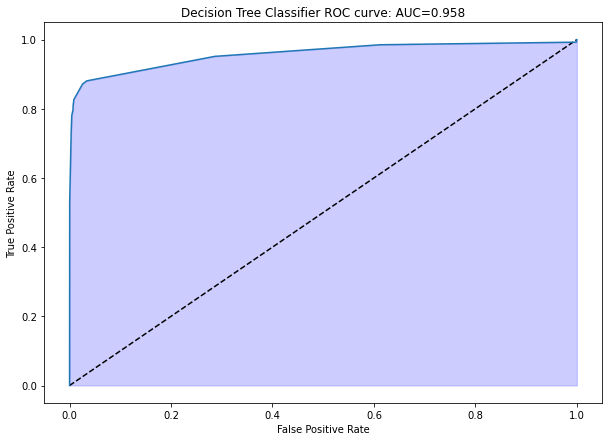

In [17]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
dc_best_prob = dc_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, dc_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, dc_best_prob[:, 1])
plt.title('Decision Tree Classifier ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_df['Decision_tree']['AUC'] = AUC

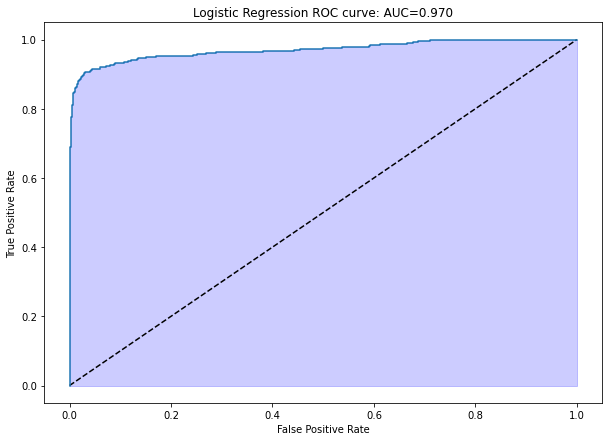

In [18]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
lg_best_prob = lg_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, lg_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, lg_best_prob[:, 1])
plt.title('Logistic Regression ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_df['Logistic_regression']['AUC'] = AUC

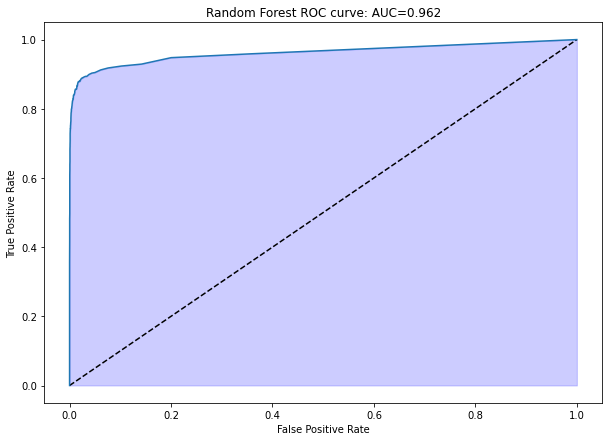

In [19]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
rf_best_prob = rf_best.predict_proba(X_test)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, rf_best_prob[:, 1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC = roc_auc_score(y_test, rf_best_prob[:, 1])
plt.title('Random Forest ROC curve: AUC={0:0.3f}'.format(AUC))
plt.show()

performance_df['Random_forest']['AUC'] = AUC

In [20]:
performance_df

,Decision_tree,Logistic_regression,Random_forest
time(s),0.04897,0.028983,1.69182
accuracy,0.976299,0.977315,0.978162
recall,0.807836,0.811567,0.833955
f1_score_weighted,0.975594,0.976618,0.977688
AUC,0.958175,0.96953,0.961939
